# 使用维基百科下载中文语料库

In [1]:
'''
因为自己从网上下载太慢，最后用同学提供的百度云下载的
维基百科中文20190720 链接：https://pan.baidu.com/s/1e-6qvhIzZDNjOb63ikw8dQ 
提取码：io70 
感谢周伟杰同学的分享！
'''

'\n维基百科中文20190720 链接：https://pan.baidu.com/s/1e-6qvhIzZDNjOb63ikw8dQ \n提取码：io70 \n感谢周伟杰同学的分享！\n\n'

# 使用python wikipedia extractor抽取维基百科的内容

In [ ]:
'''
因为我们下载的语料库文件类型是xml,所以我们要提取中间的文本，我们是通过wikipedia extractor 来抽取的，有两种方式
1.通过cmd命令
  python D:\tools\维基百科中文20190720\WikiExtractor.py -b 1000M -o extracted D:\tools\维基百科中文20190720\zhwiki-multistream.xml.bz2为分的每个文件的大小
  1000M为分的每个文件的大小
2.通过代码来实现
'''

In [7]:
wiki_dir = "G:/github/lesson4/"
wiki_file = ""

In [ ]:
'''
对于抽取出来的内容，我们要过滤掉中间的停用词。停用词是指在信息检索中，
为节省存储空间和提高搜索效率，在处理自然语言数据（或文本）之前或之后会
自动过滤掉某些字或词，这些字或词即被称为Stop Words（停用词）。
'''

In [8]:
#获取停用词
def get_stop_words():
    stop_words_set = set()
    with open(wiki_dir + "stop_words/stopwords.txt","r",encoding = 'utf-8') as stopwords:
        for words in stopwords:
            stop_words_set.add(words.strip('\n'))
    return stop_words_set

stopwords = get_stop_words()
i = 0
for s in stopwords:
    if i < 10:
        print(s)
    i += 1

上面
以前
所幸
良好
望
呐
甚且
∪φ∈
即如
的


In [95]:
from hanziconv import HanziConv
import jieba ,re,logging
'''
解析文本
1.使用正则表达式过滤掉多余标签
2.使用hanziconv将繁体转换为简体
3.使用jieba将文本分词

'''
def parse_wiki_content(read_file,out_put_file):
    out_put = open(out_put_file,"w",encoding = "utf-8")
    read_file_text = open(read_file,"r",encoding = "utf-8")
    write_line_content = ""
    stop_words = get_stop_words()
    regex_str = "[^<doc.*>$]|[^</doc>$]"
    line_content = read_file_text.readline()
    while line_content:
        match_content = re.match(regex_str,line_content)
        line_content = line_content.strip("\n")
        line_content = HanziConv.toSimplified(line_content)
        line_content = list(jieba.cut(line_content,cut_all = False))
        for w in line_content:
            if w not in stop_words:
                write_line_content += w + " "
        out_put.write(write_line_content + "\n")
        write_line_content = ""
        line_content = read_file_text.readline()#一行为一篇文章
    out_put.close()

In [88]:
#解析Wiki文档，繁体转简体 jieba分词 存入两个文档
def read_wiki_files():
    read_ziki_file = wiki_dir + "extracted/AA/"
    out_file = wiki_dir + "extracted/AA/out/"
    for i in range(2):
        read_file_name = read_ziki_file + str("wiki_0%s"%str(i))
        parse_wiki_content(read_file_name,out_file + str("wiki_corpus0%s"%str(i)))

In [100]:
#合并分词后的文档，将两个文档合并到一个文档
def merge_corpus():
    read_ziki_file = c
    merge_to_file = read_ziki_file+ "/merge_ziki_corpus"
    out_file = open(merge_to_file,"w",encoding = "utf-8")
    for i in range(2):
         read_file_name = read_ziki_file + str("wiki_corpus0%s"%str(i))
         read_file  = open(read_file_name,"r",encoding = "utf-8")
         line = read_file.readline()
         while line:
            out_file.writelines(line)
            line = read_file.readline()
         read_file.close()
    out_file.close()
        

In [101]:
#调用方法，测试
read_wiki_files()
merge_corpus()

In [111]:
#输出前五篇文章的分词结果
merge_to_file = wiki_dir+ "/extracted/AA/out/merge_ziki_corpus"
read_file = open(merge_to_file,"r",encoding = 'utf-8')
line = read_file.readline()
i = 0
while line:
    print(line)
    line = read_file.readline()
    i = i + 1
    if i > 6:
        break
        
    

doc   id 13   url https zh wikipedia org wiki curid 13   title 数学 

数学 



数学 利用 符号语言 研究 数量 结构 变化 空间 概念 一门 学科 某种 角度看 形式 科学 一种 数学 透过 抽象化 逻辑推理 计数 计算 量度 物体 形状 运动 观察 数学家 拓展 概念 公式化 新 猜想 选定 公理 定义 中 建立 严谨 推导 定理 



基础 数学 知识 团体 生活 中 不可或缺 一环 数学 基本概念 完善 早 古埃及 美索不达米亚 古印度 古代 数学 文本 可观 古希腊 严谨 数学 发展 持续 小幅 进展 16 世纪 文艺复兴 时期 新 科学 发现 数学 革新 交互 致使 数学 加速 发展 直至 今日 数学 国家 地区 教育 范畴 中 一部分 





In [113]:
#输分词结果
merge_to_file = wiki_dir+ "/extracted/AA/out/merge_ziki_corpus"
read_file = open(merge_to_file,"r",encoding = 'utf-8')
line = read_file.readline()
i = 0
while line:
    print(line)
    line = read_file.readline()
    i = i + 1
    if i > 10:
        break

doc   id 13   url https zh wikipedia org wiki curid 13   title 数学 

数学 



数学 利用 符号语言 研究 数量 结构 变化 空间 概念 一门 学科 某种 角度看 形式 科学 一种 数学 透过 抽象化 逻辑推理 计数 计算 量度 物体 形状 运动 观察 数学家 拓展 概念 公式化 新 猜想 选定 公理 定义 中 建立 严谨 推导 定理 



基础 数学 知识 团体 生活 中 不可或缺 一环 数学 基本概念 完善 早 古埃及 美索不达米亚 古印度 古代 数学 文本 可观 古希腊 严谨 数学 发展 持续 小幅 进展 16 世纪 文艺复兴 时期 新 科学 发现 数学 革新 交互 致使 数学 加速 发展 直至 今日 数学 国家 地区 教育 范畴 中 一部分 



今日 数学 领域 中 包括 科学 工程 医学 经济学 金融学 数学 领域 称为 数学 激起 新 数学 发现 导致 全新 学科 发展 物理学 实质性 发展 中 建立 理论 激发 数学家 角度 思考 数学家 研究 纯数学 数学 实质性 内容 不以 目标 研究 纯数学 过程 中 发现 处 



西方 语言 中 数学 词源 自于 古希腊 语 其有 学习 学问 科学 狭义 技术性 「 数学 研究 语源 形容词 学习 用功 指 数学 英语 中 表面 复数 形式 法语 中 表面 复数 形式 可溯 拉丁文 中性 复数 西塞罗 译自 希腊文 复数 此一 希腊语 亚里士多德 拿来 指 「 万物 皆 数 概念 





In [116]:
import logging
from gensim.models import word2vec

def generate_models():
    logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s",level=logging.INFO)
    sentences = word2vec.LineSentence(merge_to_file)
    model = word2vec.Word2Vec(sentences,sg=0,size=200, window=5, min_count=5, workers=6)
    #保存模型
    model.save("G:/github/lesson4/model/wiki_corpus2.model")
    model.wv.save_word2vec_format('G:/github/lesson4/model/word2vec_format.txt')

if __name__ == "__main__":
    generate_models()


2019-08-03 18:27:55,220:INFO:collecting all words and their counts
F:\Users\lenovo\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-08-03 18:27:55,540:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-03 18:27:55,848:INFO:PROGRESS: at sentence #10000, processed 476727 words, keeping 72369 word types
2019-08-03 18:27:55,998:INFO:PROGRESS: at sentence #20000, processed 881019 words, keeping 108683 word types
2019-08-03 18:27:56,249:INFO:PROGRESS: at sentence #30000, processed 1315882 words, keeping 140500 word types
2019-08-03 18:27:56,406:INFO:PROGRESS: at sentence #40000, processed 1691281 words, keeping 163108 word types
2019-08-03 18:27:56,653:INFO:PROGRESS: at 

2019-08-03 18:28:06,373:INFO:PROGRESS: at sentence #700000, processed 22544401 words, keeping 861701 word types
2019-08-03 18:28:06,557:INFO:PROGRESS: at sentence #710000, processed 22822865 words, keeping 869263 word types
2019-08-03 18:28:06,744:INFO:PROGRESS: at sentence #720000, processed 23101204 words, keeping 876538 word types
2019-08-03 18:28:06,853:INFO:PROGRESS: at sentence #730000, processed 23359490 words, keeping 883644 word types
2019-08-03 18:28:06,971:INFO:PROGRESS: at sentence #740000, processed 23644429 words, keeping 891608 word types
2019-08-03 18:28:07,083:INFO:PROGRESS: at sentence #750000, processed 23909312 words, keeping 898259 word types
2019-08-03 18:28:07,202:INFO:PROGRESS: at sentence #760000, processed 24199812 words, keeping 905378 word types
2019-08-03 18:28:07,316:INFO:PROGRESS: at sentence #770000, processed 24469988 words, keeping 912578 word types
2019-08-03 18:28:07,428:INFO:PROGRESS: at sentence #780000, processed 24743447 words, keeping 919486 wor

2019-08-03 18:28:15,566:INFO:PROGRESS: at sentence #1430000, processed 41210388 words, keeping 1313781 word types
2019-08-03 18:28:15,673:INFO:PROGRESS: at sentence #1440000, processed 41459441 words, keeping 1319426 word types
2019-08-03 18:28:15,788:INFO:PROGRESS: at sentence #1450000, processed 41731422 words, keeping 1325336 word types
2019-08-03 18:28:15,892:INFO:PROGRESS: at sentence #1460000, processed 41968594 words, keeping 1331003 word types
2019-08-03 18:28:16,013:INFO:PROGRESS: at sentence #1470000, processed 42194216 words, keeping 1336407 word types
2019-08-03 18:28:16,261:INFO:PROGRESS: at sentence #1480000, processed 42431927 words, keeping 1342028 word types
2019-08-03 18:28:16,368:INFO:PROGRESS: at sentence #1490000, processed 42678172 words, keeping 1347402 word types
2019-08-03 18:28:16,473:INFO:PROGRESS: at sentence #1500000, processed 42927820 words, keeping 1352731 word types
2019-08-03 18:28:16,575:INFO:PROGRESS: at sentence #1510000, processed 43169426 words, k

2019-08-03 18:28:23,726:INFO:PROGRESS: at sentence #2150000, processed 57924651 words, keeping 1676326 word types
2019-08-03 18:28:23,818:INFO:PROGRESS: at sentence #2160000, processed 58143714 words, keeping 1681162 word types
2019-08-03 18:28:23,918:INFO:PROGRESS: at sentence #2170000, processed 58378593 words, keeping 1685942 word types
2019-08-03 18:28:24,047:INFO:PROGRESS: at sentence #2180000, processed 58620179 words, keeping 1691245 word types
2019-08-03 18:28:24,214:INFO:PROGRESS: at sentence #2190000, processed 58841391 words, keeping 1695834 word types
2019-08-03 18:28:24,321:INFO:PROGRESS: at sentence #2200000, processed 59082499 words, keeping 1701204 word types
2019-08-03 18:28:24,422:INFO:PROGRESS: at sentence #2210000, processed 59325068 words, keeping 1706337 word types
2019-08-03 18:28:24,521:INFO:PROGRESS: at sentence #2220000, processed 59543796 words, keeping 1712021 word types
2019-08-03 18:28:24,622:INFO:PROGRESS: at sentence #2230000, processed 59770433 words, k

2019-08-03 18:28:31,035:INFO:PROGRESS: at sentence #2870000, processed 72919235 words, keeping 2019108 word types
2019-08-03 18:28:31,138:INFO:PROGRESS: at sentence #2880000, processed 73157070 words, keeping 2023795 word types
2019-08-03 18:28:31,245:INFO:PROGRESS: at sentence #2890000, processed 73413333 words, keeping 2028594 word types
2019-08-03 18:28:31,349:INFO:PROGRESS: at sentence #2900000, processed 73639701 words, keeping 2033439 word types
2019-08-03 18:28:31,477:INFO:PROGRESS: at sentence #2910000, processed 73878332 words, keeping 2038058 word types
2019-08-03 18:28:31,581:INFO:PROGRESS: at sentence #2920000, processed 74098118 words, keeping 2042771 word types
2019-08-03 18:28:31,775:INFO:PROGRESS: at sentence #2930000, processed 74311284 words, keeping 2047442 word types
2019-08-03 18:28:31,875:INFO:PROGRESS: at sentence #2940000, processed 74535867 words, keeping 2052236 word types
2019-08-03 18:28:31,967:INFO:PROGRESS: at sentence #2950000, processed 74745206 words, k

2019-08-03 18:28:38,566:INFO:PROGRESS: at sentence #3590000, processed 87963726 words, keeping 2355182 word types
2019-08-03 18:28:38,638:INFO:PROGRESS: at sentence #3600000, processed 88057816 words, keeping 2359025 word types
2019-08-03 18:28:38,687:INFO:PROGRESS: at sentence #3610000, processed 88158260 words, keeping 2362789 word types
2019-08-03 18:28:38,729:INFO:PROGRESS: at sentence #3620000, processed 88232216 words, keeping 2365899 word types
2019-08-03 18:28:38,770:INFO:PROGRESS: at sentence #3630000, processed 88306451 words, keeping 2369130 word types
2019-08-03 18:28:38,812:INFO:PROGRESS: at sentence #3640000, processed 88383676 words, keeping 2372436 word types
2019-08-03 18:28:38,865:INFO:PROGRESS: at sentence #3650000, processed 88488599 words, keeping 2375682 word types
2019-08-03 18:28:38,932:INFO:PROGRESS: at sentence #3660000, processed 88638024 words, keeping 2379608 word types
2019-08-03 18:28:38,989:INFO:PROGRESS: at sentence #3670000, processed 88750107 words, k

2019-08-03 18:28:43,605:INFO:PROGRESS: at sentence #4310000, processed 97604461 words, keeping 2647464 word types
2019-08-03 18:28:43,659:INFO:PROGRESS: at sentence #4320000, processed 97716013 words, keeping 2651420 word types
2019-08-03 18:28:43,710:INFO:PROGRESS: at sentence #4330000, processed 97830561 words, keeping 2654507 word types
2019-08-03 18:28:43,767:INFO:PROGRESS: at sentence #4340000, processed 97942577 words, keeping 2658324 word types
2019-08-03 18:28:43,818:INFO:PROGRESS: at sentence #4350000, processed 98054451 words, keeping 2661862 word types
2019-08-03 18:28:43,864:INFO:PROGRESS: at sentence #4360000, processed 98148034 words, keeping 2664848 word types
2019-08-03 18:28:43,933:INFO:PROGRESS: at sentence #4370000, processed 98239604 words, keeping 2667701 word types
2019-08-03 18:28:43,984:INFO:PROGRESS: at sentence #4380000, processed 98342143 words, keeping 2671402 word types
2019-08-03 18:28:44,100:INFO:PROGRESS: at sentence #4390000, processed 98442156 words, k

2019-08-03 18:28:48,749:INFO:PROGRESS: at sentence #5030000, processed 107705606 words, keeping 2913099 word types
2019-08-03 18:28:48,842:INFO:PROGRESS: at sentence #5040000, processed 107924036 words, keeping 2917581 word types
2019-08-03 18:28:48,940:INFO:PROGRESS: at sentence #5050000, processed 108150238 words, keeping 2922269 word types
2019-08-03 18:28:49,072:INFO:PROGRESS: at sentence #5060000, processed 108384159 words, keeping 2926738 word types
2019-08-03 18:28:49,238:INFO:PROGRESS: at sentence #5070000, processed 108604137 words, keeping 2931203 word types
2019-08-03 18:28:49,374:INFO:PROGRESS: at sentence #5080000, processed 108826108 words, keeping 2935384 word types
2019-08-03 18:28:49,464:INFO:PROGRESS: at sentence #5090000, processed 109023506 words, keeping 2939261 word types
2019-08-03 18:28:49,547:INFO:PROGRESS: at sentence #5100000, processed 109214479 words, keeping 2943309 word types
2019-08-03 18:28:49,596:INFO:PROGRESS: at sentence #5110000, processed 109314707

2019-08-03 18:28:56,303:INFO:PROGRESS: at sentence #5750000, processed 122454766 words, keeping 3199258 word types
2019-08-03 18:28:56,389:INFO:PROGRESS: at sentence #5760000, processed 122647748 words, keeping 3203356 word types
2019-08-03 18:28:56,473:INFO:PROGRESS: at sentence #5770000, processed 122839870 words, keeping 3207377 word types
2019-08-03 18:28:56,564:INFO:PROGRESS: at sentence #5780000, processed 123044174 words, keeping 3211239 word types
2019-08-03 18:28:56,651:INFO:PROGRESS: at sentence #5790000, processed 123242698 words, keeping 3214970 word types
2019-08-03 18:28:56,737:INFO:PROGRESS: at sentence #5800000, processed 123421929 words, keeping 3218716 word types
2019-08-03 18:28:56,846:INFO:PROGRESS: at sentence #5810000, processed 123629073 words, keeping 3222591 word types
2019-08-03 18:28:56,942:INFO:PROGRESS: at sentence #5820000, processed 123848334 words, keeping 3226465 word types
2019-08-03 18:28:57,106:INFO:PROGRESS: at sentence #5830000, processed 124073770

2019-08-03 18:29:11,551:INFO:PROGRESS: at sentence #7180000, processed 151836565 words, keeping 3750306 word types
2019-08-03 18:29:11,659:INFO:PROGRESS: at sentence #7190000, processed 152038735 words, keeping 3754119 word types
2019-08-03 18:29:11,744:INFO:PROGRESS: at sentence #7200000, processed 152238529 words, keeping 3758027 word types
2019-08-03 18:29:11,840:INFO:PROGRESS: at sentence #7210000, processed 152446954 words, keeping 3762060 word types
2019-08-03 18:29:12,022:INFO:PROGRESS: at sentence #7220000, processed 152677706 words, keeping 3766019 word types
2019-08-03 18:29:12,126:INFO:PROGRESS: at sentence #7230000, processed 152906579 words, keeping 3769953 word types
2019-08-03 18:29:12,231:INFO:PROGRESS: at sentence #7240000, processed 153148498 words, keeping 3774053 word types
2019-08-03 18:29:12,345:INFO:PROGRESS: at sentence #7250000, processed 153392564 words, keeping 3778049 word types
2019-08-03 18:29:12,467:INFO:PROGRESS: at sentence #7260000, processed 153655877

2019-08-03 18:31:49,266:INFO:EPOCH 1 - PROGRESS: at 6.66% examples, 829163 words/s, in_qsize 8, out_qsize 3
2019-08-03 18:31:50,267:INFO:EPOCH 1 - PROGRESS: at 7.05% examples, 829697 words/s, in_qsize 1, out_qsize 0
2019-08-03 18:31:51,271:INFO:EPOCH 1 - PROGRESS: at 7.41% examples, 826525 words/s, in_qsize 10, out_qsize 0
2019-08-03 18:31:52,299:INFO:EPOCH 1 - PROGRESS: at 7.77% examples, 822682 words/s, in_qsize 10, out_qsize 1
2019-08-03 18:31:53,308:INFO:EPOCH 1 - PROGRESS: at 8.15% examples, 821076 words/s, in_qsize 8, out_qsize 1
2019-08-03 18:31:54,315:INFO:EPOCH 1 - PROGRESS: at 8.54% examples, 820411 words/s, in_qsize 8, out_qsize 1
2019-08-03 18:31:55,319:INFO:EPOCH 1 - PROGRESS: at 8.93% examples, 819387 words/s, in_qsize 2, out_qsize 0
2019-08-03 18:31:56,358:INFO:EPOCH 1 - PROGRESS: at 9.33% examples, 817746 words/s, in_qsize 1, out_qsize 0
2019-08-03 18:31:57,369:INFO:EPOCH 1 - PROGRESS: at 9.73% examples, 815348 words/s, in_qsize 9, out_qsize 2
2019-08-03 18:31:58,369:IN

2019-08-03 18:33:06,190:INFO:EPOCH 1 - PROGRESS: at 42.03% examples, 772258 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:33:07,200:INFO:EPOCH 1 - PROGRESS: at 42.55% examples, 771934 words/s, in_qsize 3, out_qsize 0
2019-08-03 18:33:08,211:INFO:EPOCH 1 - PROGRESS: at 43.05% examples, 771635 words/s, in_qsize 12, out_qsize 0
2019-08-03 18:33:09,251:INFO:EPOCH 1 - PROGRESS: at 43.56% examples, 771111 words/s, in_qsize 5, out_qsize 5
2019-08-03 18:33:10,263:INFO:EPOCH 1 - PROGRESS: at 44.11% examples, 771231 words/s, in_qsize 10, out_qsize 0
2019-08-03 18:33:11,264:INFO:EPOCH 1 - PROGRESS: at 44.65% examples, 771324 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:33:12,275:INFO:EPOCH 1 - PROGRESS: at 45.16% examples, 770828 words/s, in_qsize 10, out_qsize 0
2019-08-03 18:33:13,281:INFO:EPOCH 1 - PROGRESS: at 45.67% examples, 770724 words/s, in_qsize 7, out_qsize 1
2019-08-03 18:33:14,290:INFO:EPOCH 1 - PROGRESS: at 46.22% examples, 770538 words/s, in_qsize 9, out_qsize 1
2019-08-03 18:33

2019-08-03 18:34:22,388:INFO:EPOCH 1 - PROGRESS: at 89.74% examples, 763139 words/s, in_qsize 11, out_qsize 0
2019-08-03 18:34:23,409:INFO:EPOCH 1 - PROGRESS: at 90.33% examples, 763176 words/s, in_qsize 3, out_qsize 0
2019-08-03 18:34:24,413:INFO:EPOCH 1 - PROGRESS: at 90.92% examples, 763046 words/s, in_qsize 10, out_qsize 0
2019-08-03 18:34:25,419:INFO:EPOCH 1 - PROGRESS: at 91.55% examples, 763091 words/s, in_qsize 0, out_qsize 2
2019-08-03 18:34:26,533:INFO:EPOCH 1 - PROGRESS: at 92.05% examples, 762344 words/s, in_qsize 10, out_qsize 1
2019-08-03 18:34:27,550:INFO:EPOCH 1 - PROGRESS: at 92.58% examples, 762128 words/s, in_qsize 9, out_qsize 2
2019-08-03 18:34:28,563:INFO:EPOCH 1 - PROGRESS: at 93.08% examples, 761938 words/s, in_qsize 11, out_qsize 2
2019-08-03 18:34:29,567:INFO:EPOCH 1 - PROGRESS: at 93.64% examples, 761957 words/s, in_qsize 8, out_qsize 0
2019-08-03 18:34:30,584:INFO:EPOCH 1 - PROGRESS: at 94.20% examples, 761977 words/s, in_qsize 2, out_qsize 0
2019-08-03 18:3

2019-08-03 18:35:34,081:INFO:EPOCH 2 - PROGRESS: at 19.45% examples, 753100 words/s, in_qsize 12, out_qsize 0
2019-08-03 18:35:35,098:INFO:EPOCH 2 - PROGRESS: at 19.89% examples, 753061 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:35:36,102:INFO:EPOCH 2 - PROGRESS: at 20.35% examples, 753342 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:35:37,103:INFO:EPOCH 2 - PROGRESS: at 20.77% examples, 752347 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:35:38,112:INFO:EPOCH 2 - PROGRESS: at 21.20% examples, 751963 words/s, in_qsize 0, out_qsize 2
2019-08-03 18:35:39,125:INFO:EPOCH 2 - PROGRESS: at 21.66% examples, 752085 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:35:40,134:INFO:EPOCH 2 - PROGRESS: at 22.14% examples, 752255 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:35:41,144:INFO:EPOCH 2 - PROGRESS: at 22.59% examples, 751800 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:35:42,151:INFO:EPOCH 2 - PROGRESS: at 23.03% examples, 750984 words/s, in_qsize 11, out_qsize 1
2019-08-03 18:35:

2019-08-03 18:36:50,025:INFO:EPOCH 2 - PROGRESS: at 63.61% examples, 736251 words/s, in_qsize 1, out_qsize 0
2019-08-03 18:36:51,032:INFO:EPOCH 2 - PROGRESS: at 64.22% examples, 736120 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:36:52,039:INFO:EPOCH 2 - PROGRESS: at 64.75% examples, 735979 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:36:53,040:INFO:EPOCH 2 - PROGRESS: at 65.33% examples, 735663 words/s, in_qsize 5, out_qsize 0
2019-08-03 18:36:54,052:INFO:EPOCH 2 - PROGRESS: at 65.80% examples, 735499 words/s, in_qsize 10, out_qsize 2
2019-08-03 18:36:55,063:INFO:EPOCH 2 - PROGRESS: at 66.28% examples, 735610 words/s, in_qsize 0, out_qsize 3
2019-08-03 18:36:56,075:INFO:EPOCH 2 - PROGRESS: at 66.75% examples, 735070 words/s, in_qsize 7, out_qsize 5
2019-08-03 18:36:57,082:INFO:EPOCH 2 - PROGRESS: at 67.59% examples, 735402 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:36:58,087:INFO:EPOCH 2 - PROGRESS: at 68.09% examples, 735179 words/s, in_qsize 9, out_qsize 0
2019-08-03 18:36:5

2019-08-03 18:38:00,851:INFO:EPOCH 3 - PROGRESS: at 0.24% examples, 777375 words/s, in_qsize 2, out_qsize 1
2019-08-03 18:38:01,854:INFO:EPOCH 3 - PROGRESS: at 0.52% examples, 796579 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:38:02,863:INFO:EPOCH 3 - PROGRESS: at 0.79% examples, 784581 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:38:03,877:INFO:EPOCH 3 - PROGRESS: at 1.03% examples, 754465 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:38:04,882:INFO:EPOCH 3 - PROGRESS: at 1.36% examples, 743746 words/s, in_qsize 11, out_qsize 0
2019-08-03 18:38:05,894:INFO:EPOCH 3 - PROGRESS: at 1.66% examples, 744268 words/s, in_qsize 12, out_qsize 5
2019-08-03 18:38:06,895:INFO:EPOCH 3 - PROGRESS: at 1.99% examples, 756260 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:38:07,911:INFO:EPOCH 3 - PROGRESS: at 2.32% examples, 759003 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:38:08,916:INFO:EPOCH 3 - PROGRESS: at 2.61% examples, 757051 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:38:09,925:IN

2019-08-03 18:39:18,014:INFO:EPOCH 3 - PROGRESS: at 30.52% examples, 729582 words/s, in_qsize 9, out_qsize 1
2019-08-03 18:39:19,035:INFO:EPOCH 3 - PROGRESS: at 31.16% examples, 729788 words/s, in_qsize 10, out_qsize 1
2019-08-03 18:39:20,083:INFO:EPOCH 3 - PROGRESS: at 31.60% examples, 729474 words/s, in_qsize 5, out_qsize 4
2019-08-03 18:39:21,087:INFO:EPOCH 3 - PROGRESS: at 32.09% examples, 729927 words/s, in_qsize 8, out_qsize 0
2019-08-03 18:39:22,092:INFO:EPOCH 3 - PROGRESS: at 32.54% examples, 730260 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:39:23,098:INFO:EPOCH 3 - PROGRESS: at 33.06% examples, 729946 words/s, in_qsize 6, out_qsize 1
2019-08-03 18:39:24,129:INFO:EPOCH 3 - PROGRESS: at 33.50% examples, 729451 words/s, in_qsize 9, out_qsize 3
2019-08-03 18:39:25,137:INFO:EPOCH 3 - PROGRESS: at 34.12% examples, 729503 words/s, in_qsize 7, out_qsize 3
2019-08-03 18:39:26,168:INFO:EPOCH 3 - PROGRESS: at 34.63% examples, 729651 words/s, in_qsize 3, out_qsize 1
2019-08-03 18:39:2

2019-08-03 18:40:34,000:INFO:EPOCH 3 - PROGRESS: at 75.46% examples, 721391 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:40:35,001:INFO:EPOCH 3 - PROGRESS: at 75.99% examples, 721276 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:40:36,014:INFO:EPOCH 3 - PROGRESS: at 76.47% examples, 721477 words/s, in_qsize 1, out_qsize 0
2019-08-03 18:40:37,025:INFO:EPOCH 3 - PROGRESS: at 76.96% examples, 721340 words/s, in_qsize 5, out_qsize 1
2019-08-03 18:40:38,072:INFO:EPOCH 3 - PROGRESS: at 77.47% examples, 721135 words/s, in_qsize 6, out_qsize 5
2019-08-03 18:40:39,088:INFO:EPOCH 3 - PROGRESS: at 78.07% examples, 721565 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:40:40,111:INFO:EPOCH 3 - PROGRESS: at 78.61% examples, 721641 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:40:41,117:INFO:EPOCH 3 - PROGRESS: at 79.08% examples, 721835 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:40:42,122:INFO:EPOCH 3 - PROGRESS: at 79.59% examples, 721698 words/s, in_qsize 11, out_qsize 1
2019-08-03 18:40:4

2019-08-03 18:41:45,926:INFO:EPOCH 4 - PROGRESS: at 7.78% examples, 755171 words/s, in_qsize 8, out_qsize 3
2019-08-03 18:41:46,969:INFO:EPOCH 4 - PROGRESS: at 8.17% examples, 756077 words/s, in_qsize 5, out_qsize 0
2019-08-03 18:41:47,977:INFO:EPOCH 4 - PROGRESS: at 8.54% examples, 756877 words/s, in_qsize 3, out_qsize 0
2019-08-03 18:41:49,021:INFO:EPOCH 4 - PROGRESS: at 8.87% examples, 753211 words/s, in_qsize 12, out_qsize 0
2019-08-03 18:41:50,034:INFO:EPOCH 4 - PROGRESS: at 9.28% examples, 754372 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:41:51,040:INFO:EPOCH 4 - PROGRESS: at 9.65% examples, 753175 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:41:52,041:INFO:EPOCH 4 - PROGRESS: at 10.01% examples, 751596 words/s, in_qsize 10, out_qsize 0
2019-08-03 18:41:53,073:INFO:EPOCH 4 - PROGRESS: at 10.40% examples, 751114 words/s, in_qsize 11, out_qsize 1
2019-08-03 18:41:54,075:INFO:EPOCH 4 - PROGRESS: at 10.80% examples, 751657 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:41:55,07

2019-08-03 18:43:02,091:INFO:EPOCH 4 - PROGRESS: at 41.64% examples, 733915 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:43:03,092:INFO:EPOCH 4 - PROGRESS: at 42.13% examples, 733232 words/s, in_qsize 12, out_qsize 0
2019-08-03 18:43:04,096:INFO:EPOCH 4 - PROGRESS: at 42.65% examples, 733353 words/s, in_qsize 1, out_qsize 0
2019-08-03 18:43:05,102:INFO:EPOCH 4 - PROGRESS: at 43.12% examples, 733235 words/s, in_qsize 1, out_qsize 0
2019-08-03 18:43:06,119:INFO:EPOCH 4 - PROGRESS: at 43.60% examples, 732828 words/s, in_qsize 8, out_qsize 1
2019-08-03 18:43:07,144:INFO:EPOCH 4 - PROGRESS: at 44.11% examples, 732620 words/s, in_qsize 8, out_qsize 0
2019-08-03 18:43:08,177:INFO:EPOCH 4 - PROGRESS: at 44.63% examples, 732609 words/s, in_qsize 11, out_qsize 2
2019-08-03 18:43:09,192:INFO:EPOCH 4 - PROGRESS: at 45.16% examples, 732719 words/s, in_qsize 0, out_qsize 2
2019-08-03 18:43:10,199:INFO:EPOCH 4 - PROGRESS: at 45.63% examples, 732396 words/s, in_qsize 2, out_qsize 0
2019-08-03 18:43:

2019-08-03 18:44:18,344:INFO:EPOCH 4 - PROGRESS: at 86.92% examples, 720831 words/s, in_qsize 10, out_qsize 1
2019-08-03 18:44:19,344:INFO:EPOCH 4 - PROGRESS: at 87.39% examples, 720896 words/s, in_qsize 11, out_qsize 1
2019-08-03 18:44:20,369:INFO:EPOCH 4 - PROGRESS: at 87.92% examples, 720862 words/s, in_qsize 4, out_qsize 3
2019-08-03 18:44:21,379:INFO:EPOCH 4 - PROGRESS: at 88.44% examples, 721051 words/s, in_qsize 7, out_qsize 0
2019-08-03 18:44:22,407:INFO:EPOCH 4 - PROGRESS: at 88.92% examples, 721054 words/s, in_qsize 12, out_qsize 0
2019-08-03 18:44:23,411:INFO:EPOCH 4 - PROGRESS: at 89.45% examples, 721247 words/s, in_qsize 3, out_qsize 0
2019-08-03 18:44:24,416:INFO:EPOCH 4 - PROGRESS: at 89.94% examples, 721066 words/s, in_qsize 11, out_qsize 3
2019-08-03 18:44:25,431:INFO:EPOCH 4 - PROGRESS: at 90.54% examples, 721345 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:44:26,447:INFO:EPOCH 4 - PROGRESS: at 91.16% examples, 721217 words/s, in_qsize 9, out_qsize 0
2019-08-03 18:4

2019-08-03 18:45:30,031:INFO:EPOCH 5 - PROGRESS: at 16.58% examples, 742914 words/s, in_qsize 11, out_qsize 0
2019-08-03 18:45:31,039:INFO:EPOCH 5 - PROGRESS: at 17.02% examples, 743626 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:45:32,044:INFO:EPOCH 5 - PROGRESS: at 17.41% examples, 743440 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:45:33,064:INFO:EPOCH 5 - PROGRESS: at 17.84% examples, 743206 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:45:34,086:INFO:EPOCH 5 - PROGRESS: at 18.25% examples, 742795 words/s, in_qsize 8, out_qsize 0
2019-08-03 18:45:35,096:INFO:EPOCH 5 - PROGRESS: at 18.65% examples, 742720 words/s, in_qsize 9, out_qsize 2
2019-08-03 18:45:36,100:INFO:EPOCH 5 - PROGRESS: at 19.07% examples, 742711 words/s, in_qsize 9, out_qsize 1
2019-08-03 18:45:37,119:INFO:EPOCH 5 - PROGRESS: at 19.51% examples, 742431 words/s, in_qsize 9, out_qsize 0
2019-08-03 18:45:38,125:INFO:EPOCH 5 - PROGRESS: at 19.95% examples, 742243 words/s, in_qsize 9, out_qsize 0
2019-08-03 18:45:3

2019-08-03 18:46:46,560:INFO:EPOCH 5 - PROGRESS: at 56.29% examples, 722999 words/s, in_qsize 7, out_qsize 1
2019-08-03 18:46:47,573:INFO:EPOCH 5 - PROGRESS: at 57.49% examples, 723250 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:46:48,577:INFO:EPOCH 5 - PROGRESS: at 58.60% examples, 722908 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:46:49,590:INFO:EPOCH 5 - PROGRESS: at 59.32% examples, 722592 words/s, in_qsize 8, out_qsize 0
2019-08-03 18:46:50,613:INFO:EPOCH 5 - PROGRESS: at 59.89% examples, 722546 words/s, in_qsize 12, out_qsize 0
2019-08-03 18:46:51,641:INFO:EPOCH 5 - PROGRESS: at 60.45% examples, 722826 words/s, in_qsize 2, out_qsize 1
2019-08-03 18:46:52,697:INFO:EPOCH 5 - PROGRESS: at 61.17% examples, 721912 words/s, in_qsize 0, out_qsize 1
2019-08-03 18:46:53,721:INFO:EPOCH 5 - PROGRESS: at 62.48% examples, 721048 words/s, in_qsize 9, out_qsize 0
2019-08-03 18:46:54,734:INFO:EPOCH 5 - PROGRESS: at 63.51% examples, 720981 words/s, in_qsize 4, out_qsize 1
2019-08-03 18:46:5

2019-08-03 18:48:02,688:INFO:EPOCH 5 - PROGRESS: at 98.52% examples, 721093 words/s, in_qsize 10, out_qsize 0
2019-08-03 18:48:03,694:INFO:EPOCH 5 - PROGRESS: at 99.10% examples, 721180 words/s, in_qsize 0, out_qsize 0
2019-08-03 18:48:04,697:INFO:EPOCH 5 - PROGRESS: at 99.58% examples, 720829 words/s, in_qsize 1, out_qsize 0
2019-08-03 18:48:05,492:INFO:worker thread finished; awaiting finish of 5 more threads
2019-08-03 18:48:05,496:INFO:worker thread finished; awaiting finish of 4 more threads
2019-08-03 18:48:05,498:INFO:worker thread finished; awaiting finish of 3 more threads
2019-08-03 18:48:05,499:INFO:worker thread finished; awaiting finish of 2 more threads
2019-08-03 18:48:05,511:INFO:worker thread finished; awaiting finish of 1 more threads
2019-08-03 18:48:05,525:INFO:worker thread finished; awaiting finish of 0 more threads
2019-08-03 18:48:05,526:INFO:EPOCH - 5 : training on 161079758 raw words (145621280 effective words) took 202.1s, 720561 effective words/s
2019-08-03 

In [1]:
#相似度测试
from gensim import models
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt

model = models.Word2Vec.load("G:/github/lesson4/model/wiki_corpus3.model")
one_corpus = ["美丽"]
result = model.most_similar(one_corpus[0],topn = 100)
print(result)

F:\Users\lenovo\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[('漂亮', 0.6386852264404297), ('优雅', 0.583888590335846), ('可爱', 0.5837887525558472), ('优美', 0.5700699687004089), ('温柔', 0.565923810005188), ('美好', 0.5635802745819092), ('宁静', 0.5481542944908142), ('孤独', 0.5335177779197693), ('梦幻', 0.5127020478248596), ('爱', 0.5122554302215576), ('幸福', 0.5028339624404907), ('景色', 0.5014929175376892), ('高贵', 0.4965135157108307), ('浪漫', 0.49452582001686096), ('华丽', 0.48725205659866333), ('女人', 0.47846075892448425), ('妳', 0.47560226917266846), ('性感', 0.47436654567718506), ('光辉', 0.47234877943992615), ('不可思议', 0.4709252715110779), ('景象', 0.4704470932483673), ('魅力', 0.46874362230300903), ('爱上', 0.46744298934936523), ('善良', 0.4668131470680237), ('充满', 0.4631548523902893), ('美的', 0.4588869512081146), ('奇特', 0.4586556553840637), ('大自然', 0.45628565549850464), ('情人', 0.4562360644340515), ('天堂', 0.4560094177722931), ('温暖', 0.4542793035507202), ('风景', 0.4538509249687195), ('安静', 0.4536818563938141), ('心中', 0.45360368490219116), ('拥抱', 0.45294857025146484), ('犹如', 0.

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


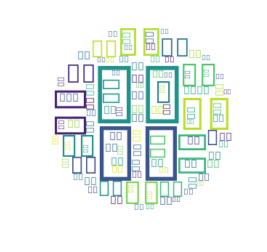

In [9]:

#获取一个圆形的mask
def get_mask():
    x,y = np.ogrid[:300,:300]#ogrid生成二维数组，第一个数组是以纵向产生的，即数组第二维的大小始终为1。第二个数组是以横向产生的，即数组第一维的大小始终为1
    mask = (x-150) ** 2 + (y-150)**2 > 130 ** 2
    mask = 255 * mask.astype(int)
    return mask
#绘制词云
def draw_word_cloud(word_cloud):
    wc = WordCloud(background_color="white",mask=get_mask())
    wc.generate_from_frequencies(word_cloud)
    #隐藏x轴和y轴
    plt.axis("off")
    plt.imshow(wc,interpolation="bilinear")
    plt.show()
word_cloud_dic = dict()
for s in result:
    word_cloud_dic[s[0]] = s[1]
draw_word_cloud(word_cloud_dic)

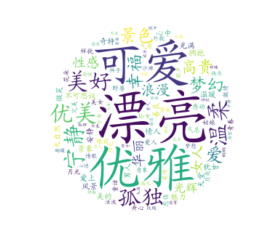

In [10]:
font = wiki_dir + "Fonts/simkai.ttf"
#绘制词云
def draw_word_cloud(word_cloud):
    wc = WordCloud(font_path = font,background_color="white",mask=get_mask())
    wc.generate_from_frequencies(word_cloud)
    #隐藏x轴和y轴
    plt.axis("off")
    plt.imshow(wc,interpolation="bilinear")
    plt.show()
draw_word_cloud(word_cloud_dic)
#WordCloud方法输出中文必须指定font_path,不然中文显是不了

In [128]:
i = 0
for s in result:
    print(s[0] , ":" , s[1])
    i += 1
    if i > 5:
        break

迷人 : 0.6114518046379089
漂亮 : 0.6003423929214478
最美 : 0.5942984819412231
甜美 : 0.5817553997039795
美好 : 0.5757955312728882
诱人 : 0.572830080986023


In [131]:
#查看单个词语的词向量
print(model.wv['美丽']) 

[-2.2093570e-02  1.4574734e+00  5.0807607e-01 -4.9566635e-01
 -7.5796008e-01 -9.9410611e-01  2.1658657e+00 -7.0001566e-01
 -1.6466442e-01 -1.7535965e+00  2.3820016e+00 -3.2873461e-01
  1.2321887e+00  1.3650900e+00  2.9947539e-03 -9.6621662e-01
 -6.8516737e-01 -1.6006818e-01  1.4007987e+00  1.2471058e+00
  6.4338660e-01  1.9793561e-01  1.8147601e+00  1.8099444e+00
 -6.9174981e-01  1.0717726e+00 -1.5252886e+00 -1.1750644e+00
 -2.3263857e-01  1.1597453e+00  1.3859762e+00  1.3488425e+00
  6.8697912e-01  1.0083705e+00  4.2640451e-01 -2.8026309e+00
 -1.8326781e+00 -2.9677637e+00  2.6487210e+00  1.0171221e+00
 -3.3939738e-02  7.2336590e-01  1.0676137e+00 -1.3449520e+00
 -1.5376471e+00 -4.6149093e-01  1.0879937e+00 -4.7995672e-01
 -1.2608464e+00  2.7391469e+00 -6.5676951e-01  4.7362164e-01
 -3.1831512e+00  1.6510323e+00  1.2403390e+00 -1.3980519e+00
 -1.4940954e+00 -9.5677274e-01  8.0786532e-01 -7.7590704e-01
  4.3593818e-01 -9.5163280e-01  8.9111829e-01  1.5542165e+00
  8.8888139e-01  1.36224

In [ ]:
plt.annotate

In [23]:
from sklearn.manifold import TSNE
from matplotlib.font_manager import FontProperties
ttf =  "G:/github/lesson4/Fonts/simkai.ttf"
font = FontProperties(fname=r"G:\github\lesson4\Fonts\simkai.ttf", size=14)#不设置改参数显是中文乱码
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     fontproperties=font,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


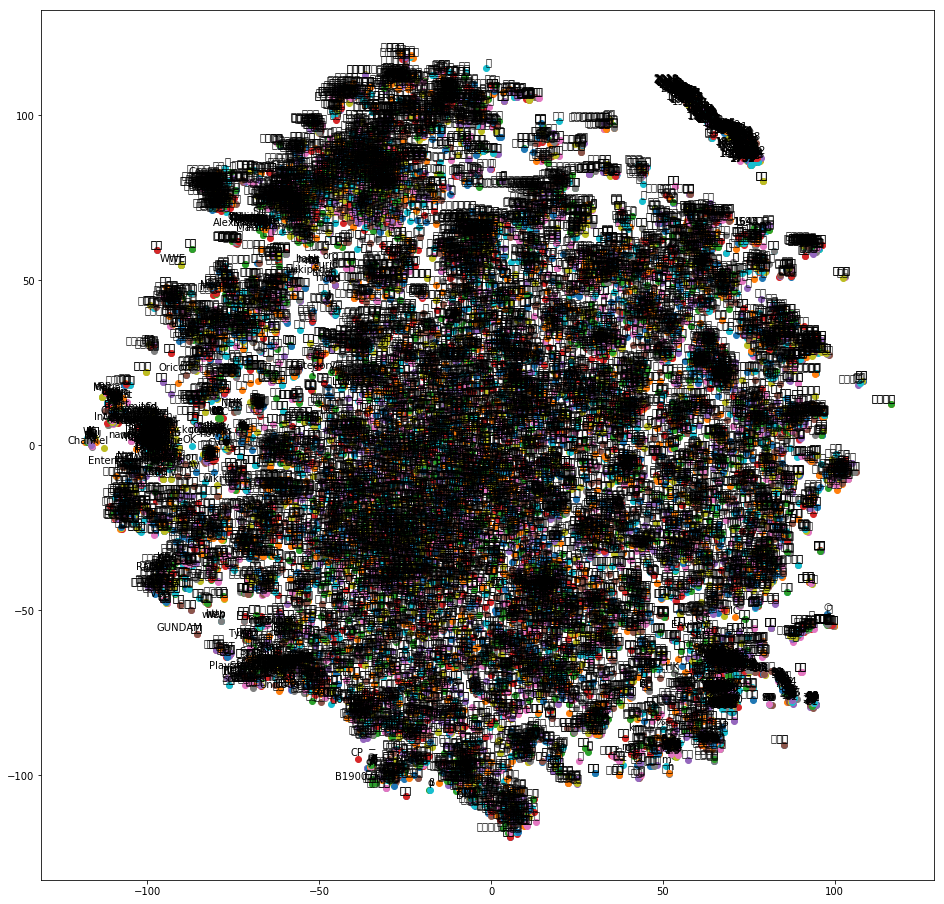

In [12]:
tsne_plot(model)#没有设置fontproperties属性的效果

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


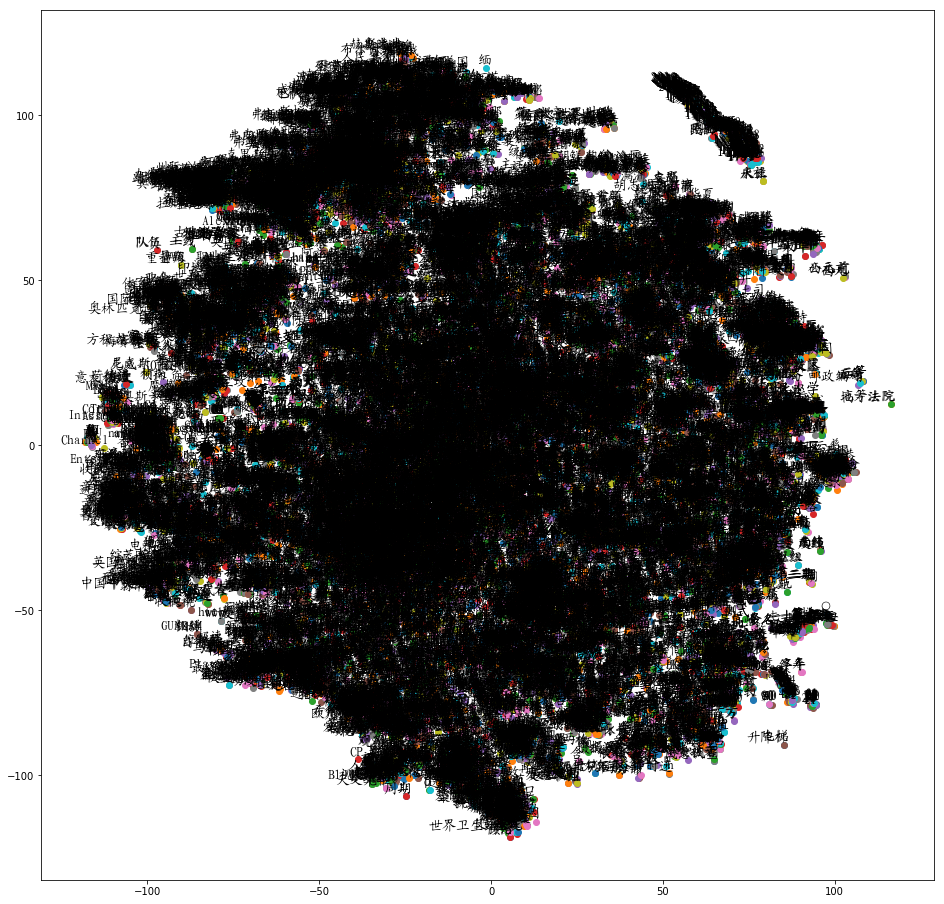

In [24]:
tsne_plot(model)#这个是min_count = 1000的效果

In [ ]:
'''
遇到的问题
1.乱码
  WordCloud需要设置font_path = "G:\github\lesson4\Fonts\simkai.ttf"
  matplotlib.pyplot需要设置FontProperties
  font = FontProperties(fname=r"G:\github\lesson4\Fonts\simkai.ttf", size=14)
2.训练模型运行速度特别慢
   UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
  提示这个警告，是因为我的gensim版本太高了我装的是3.8的，其实3.7或3.6的都可以
3.最后一个问题就是绘制上面这个图的时候如果训练模型的时候min_count设置的特别小的话，运行特别慢，最后我把min_count设置成1000训练的模型
  绘制图形比较快，min_count= 5，我运行了快一天也没出结果！
'''
